In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Load the Dataset
df = pd.read_csv('/content/IRIS.csv')

#Exploring the Dataset

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 5)

In [7]:
# Checking for duplicates
df.duplicated().sum()

3

In [8]:
# Dropping duplicates
df.drop_duplicates(inplace = True)

In [9]:
# Checking for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

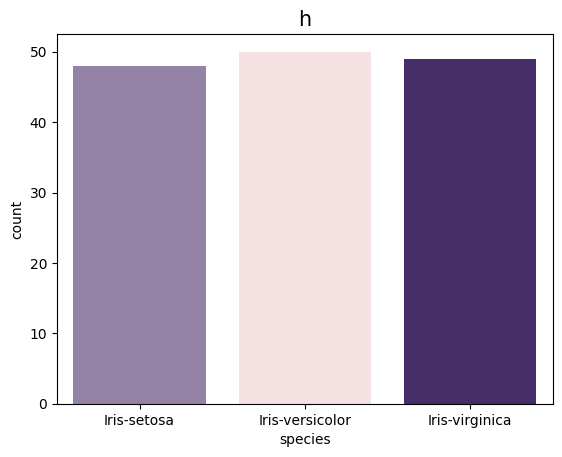

In [48]:
sns.countplot(x=df["species"], palette=["#957DAD", "#F9DEDF", "#432371"])
plt.show()

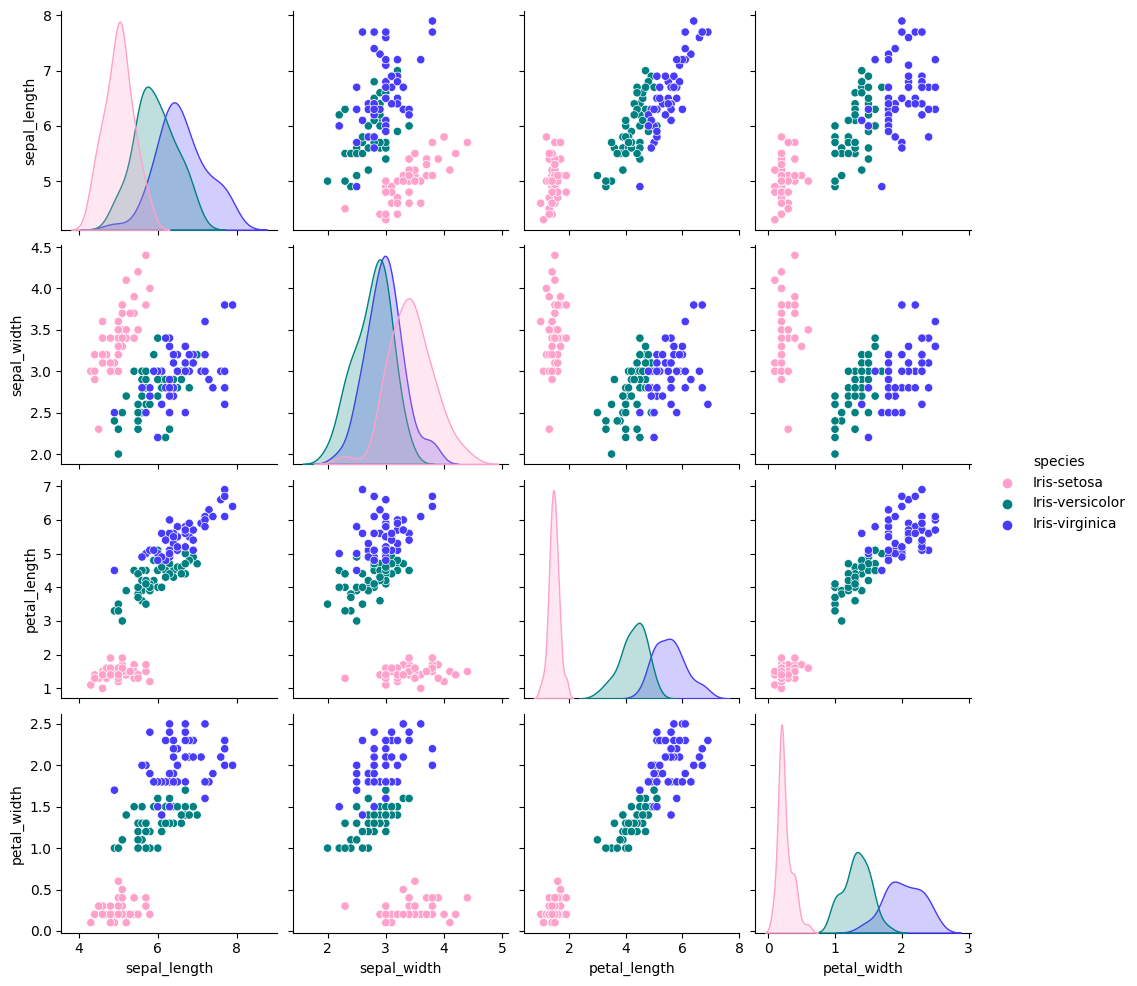

In [60]:
sns.pairplot(df, hue='species', palette=["#FFA1CA", "#008080", "#483bfa"])
plt.show()

#Modeling

In [10]:
# splitting data
y = df['species']
x = df.drop(columns='species', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=30, test_size=0.3)

In [11]:
# DecisionTree
DecTree = tree.DecisionTreeClassifier(random_state = 0)
DecTree.fit(X_train, Y_train)
y_pred = DecTree.predict(X_test)

# Evaluation
cr=classification_report(Y_test, y_pred)
print(cr)

print("Confusion Matrix")
cm = confusion_matrix(Y_test, y_pred)
print(cm)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

Confusion Matrix
[[13  0  0]
 [ 0 15  1]
 [ 0  1 15]]


In [12]:
# Random Forest
model = RandomForestClassifier(random_state = 0)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# Evaluation
cr=classification_report(Y_test, y_pred)
print(cr)

print("Confusion Matrix")
cm = confusion_matrix(Y_test, y_pred)
print(cm)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

Confusion Matrix
[[13  0  0]
 [ 0 15  1]
 [ 0  1 15]]


In [24]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# Evaluation
cr=classification_report(Y_test, y_pred)
print(cr)

print("Confusion Matrix")
cm = confusion_matrix(Y_test, y_pred)
print(cm)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

Confusion Matrix
[[13  0  0]
 [ 0 15  1]
 [ 0  1 15]]
